<a href="https://colab.research.google.com/github/Biosticianenoch/Heart-Disease-Web-App/blob/main/Copy_of_Heart_Disease_PredictioNn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction & Prognosis**

In [ ]:
## Install required modules
!pip install pyjanitor
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 2.2 MB/s eta 0:00:00


**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import janitor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import time

Mounted at /content/drive


**Load the dataset**

In [ ]:
file_path = '/content/drive/My Drive/heart.csv'
df = pd.read_csv(file_path).clean_names()

**View the first few observations of the dataset**

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
## Assess the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
## Checking for missing values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
## Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
## Drop Duplicates
df = df.drop_duplicates()

In [ ]:
## Number of males and females whose heart data is stored in the dataset
df.sex.value_counts()

,count
sex,
1,206
0,96


In [ ]:
## Count of the number of males and females who have heart disease
df.sex[df.target==1].value_counts()

,count
sex,
1,92
0,72


Text(0, 0.5, 'Number of people with heart disease')

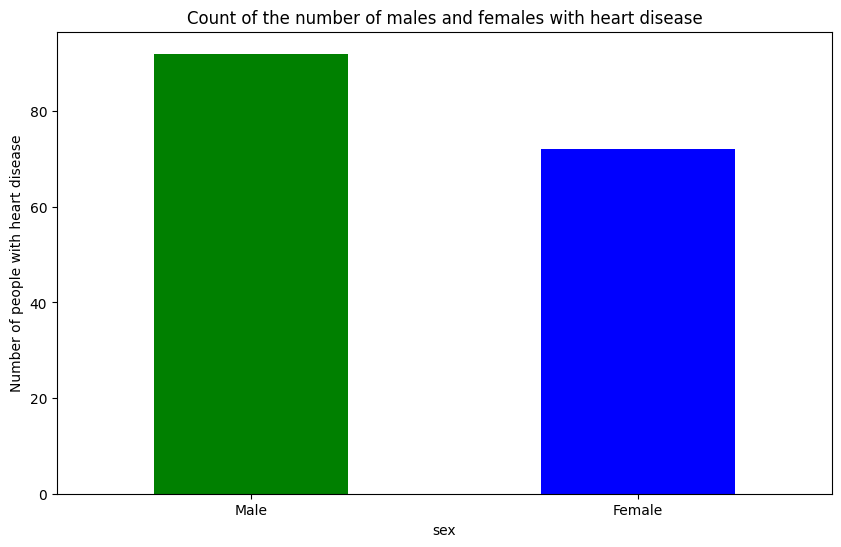

In [ ]:
## Visualize your results
df.sex[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xticks(rotation=0);
plt.xticks([0, 1], ["Male", "Female"])
plt.ylabel("Number of people with heart disease")

In [ ]:
## Contingency table
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,92


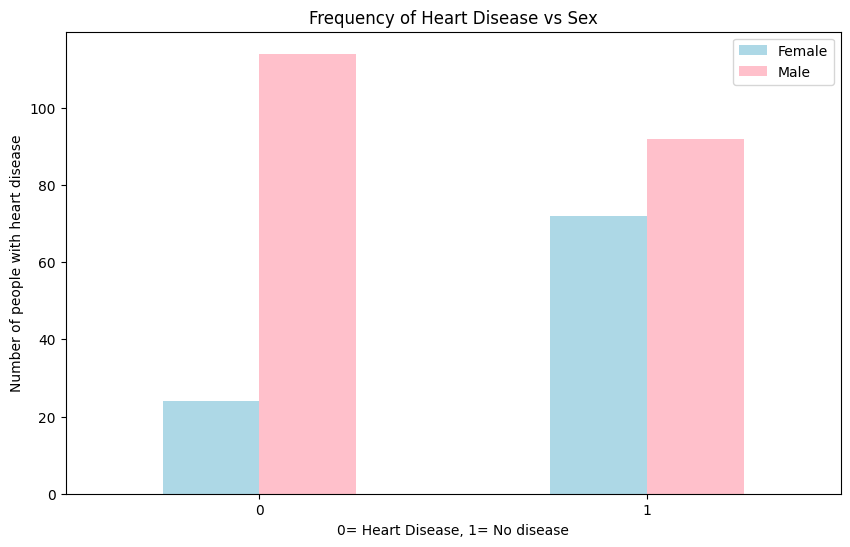

In [ ]:
## Visualize the contingency table
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [ ]:
## Building a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


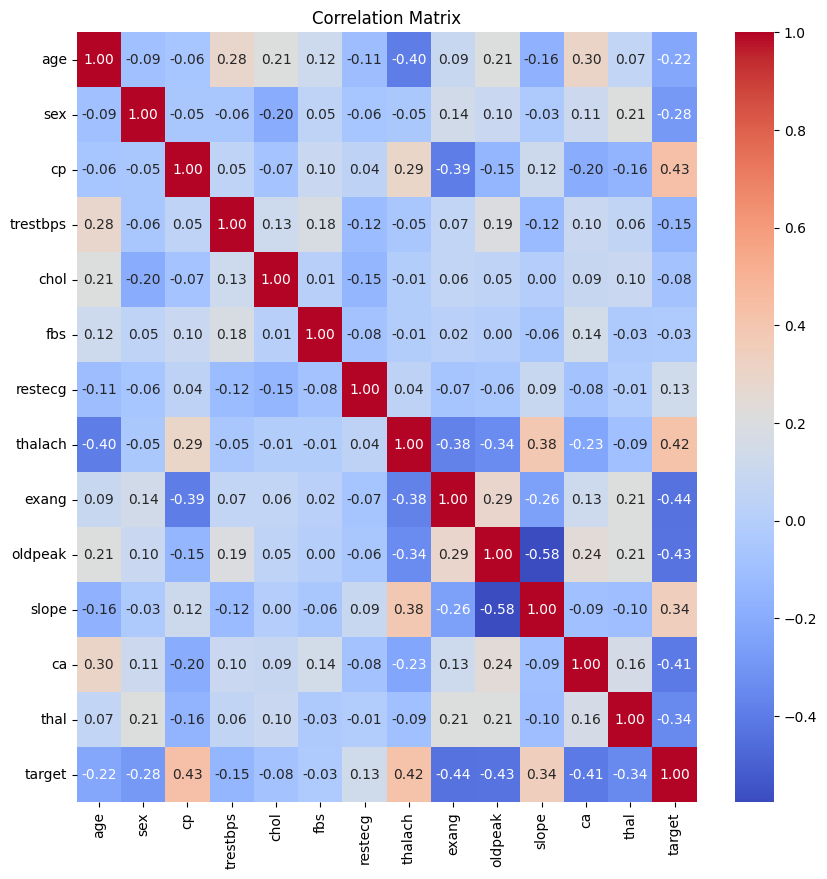

In [ ]:
## Visualize the correlation matrix
cor_mat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat,annot=True,cmap="coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Machine Learning

In [ ]:
## Standardization using the MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['age', 'trestbps', 'thalach' ,'oldpeak' , 'chol']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,0


In [ ]:
## Creating Features and Target variable
X=df.drop("target",axis=1).values
Y=df.target.values

In [ ]:
## Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
## Create a function for evaluating metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)


  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),

              }

  return print(metric_dict)

#### Fitting and Comparing different Models

In [ ]:
## K-Nearest Neighbors
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.836, 'recall': 0.931, 'F1 score': 0.844}


In [ ]:
## Logistic Regression
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.787, 'recall': 0.862, 'F1 score': 0.794}


In [ ]:
## Random Forest
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.852, 'recall': 0.897, 'F1 score': 0.852}


In [ ]:
## Support Vector Machines
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.836, 'recall': 0.966, 'F1 score': 0.848}


In [ ]:
## XGBOOST
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

{'accuracy': 0.803, 'recall': 0.862, 'F1 score': 0.806}


## Comparing the performance of different models

In [ ]:
## Model comparison
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,78.688525
1,Random Forest,85.245902
2,K-Nearest Neighbour,83.606557
3,Support Vector Machine,83.606557
4,XGBoost,80.327869


# Model Tuning

In [ ]:
## Tuning KNN
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value

    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, Y_train).score(X_test,Y_test)}%")

Accuracy with 1 no. of neighbors: 0.7540983606557377%
Accuracy with 2 no. of neighbors: 0.7540983606557377%
Accuracy with 3 no. of neighbors: 0.8524590163934426%
Accuracy with 4 no. of neighbors: 0.8360655737704918%
Accuracy with 5 no. of neighbors: 0.8360655737704918%
Accuracy with 6 no. of neighbors: 0.819672131147541%
Accuracy with 7 no. of neighbors: 0.8032786885245902%
Accuracy with 8 no. of neighbors: 0.8360655737704918%
Accuracy with 9 no. of neighbors: 0.8032786885245902%
Accuracy with 10 no. of neighbors: 0.8360655737704918%
Accuracy with 11 no. of neighbors: 0.8360655737704918%
Accuracy with 12 no. of neighbors: 0.8360655737704918%
Accuracy with 13 no. of neighbors: 0.8524590163934426%
Accuracy with 14 no. of neighbors: 0.8524590163934426%
Accuracy with 15 no. of neighbors: 0.819672131147541%
Accuracy with 16 no. of neighbors: 0.8524590163934426%
Accuracy with 17 no. of neighbors: 0.8688524590163934%
Accuracy with 18 no. of neighbors: 0.8852459016393442%
Accuracy with 19 no. 

In [ ]:
## Fitting the KNN with the best numner of neighbors
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=1)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.754, 'recall': 0.793, 'F1 score': 0.754}


In [ ]:
## Hyper parameter tuning SVC using GridSearchCV
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

gs_clf = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3)

# fitting the model for grid search
gs_clf.fit(X_train, Y_train)

print(gs_clf.best_params_)

print(f"Accuracy score:{gs_clf.score(X_test,Y_test)}%")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.812 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
## Hyper parameter tuning KNN using GridSearchCV
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, Y_train)

gs_knn.best_params_

print(f"Accuracy score:{gs_knn.score(X_test,Y_test)*100}%")


Fitting 5 folds for each of 1421 candidates, totalling 7105 fits
Accuracy score:83.60655737704919%


In [ ]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train,Y_train)
xgb_score=XGB_clf.score(X_test,Y_test)
xgb_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,xgb_Y_pred)

{'accuracy': 0.803, 'recall': 0.862, 'F1 score': 0.806}


## Comparing Models after hyperparameter tuning

In [ ]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost'], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100, XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,78.688525
1,Random Forest,85.245902
2,K-Nearest Neighbour,75.409836
3,Support Vector Machine,83.606557
4,Extreme Gradient Boost,80.327869


In [ ]:
print(" Best evaluation parameters achieved with RandomForest:")
evaluation(Y_test, RF_Y_pred)

 Best evaluation parameters achieved with RandomForest:
{'accuracy': 0.852, 'recall': 0.897, 'F1 score': 0.852}


# Visualization of the Models Results

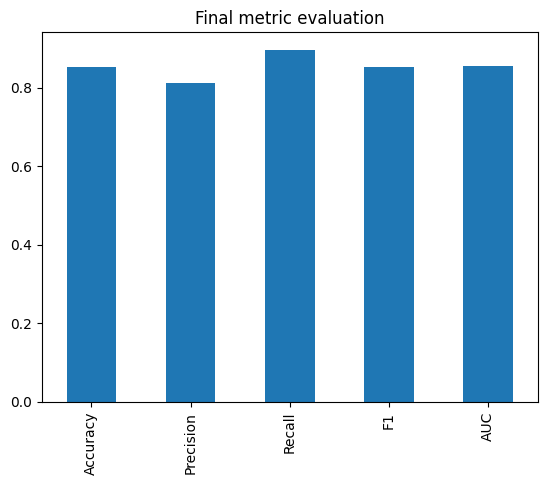

In [ ]:
final_metrics={'Accuracy': RF_clf.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,RF_Y_pred),
                   'Recall': recall_score(Y_test,RF_Y_pred),
                   'F1': f1_score(Y_test,RF_Y_pred),
                   'AUC': roc_auc_score(Y_test,RF_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

# Create the confusion matrix of the best model

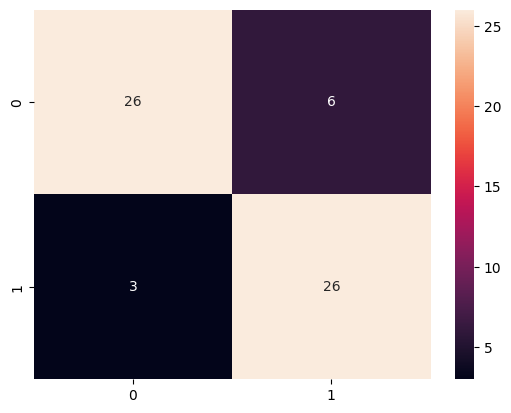

In [ ]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,RF_Y_pred),annot=True,cbar=True);

#Let's save our model using pickle

In [ ]:
## Lets save our model using pickle
import pickle as pkl
pkl.dump(RF_clf,open("final_model.p","wb"))